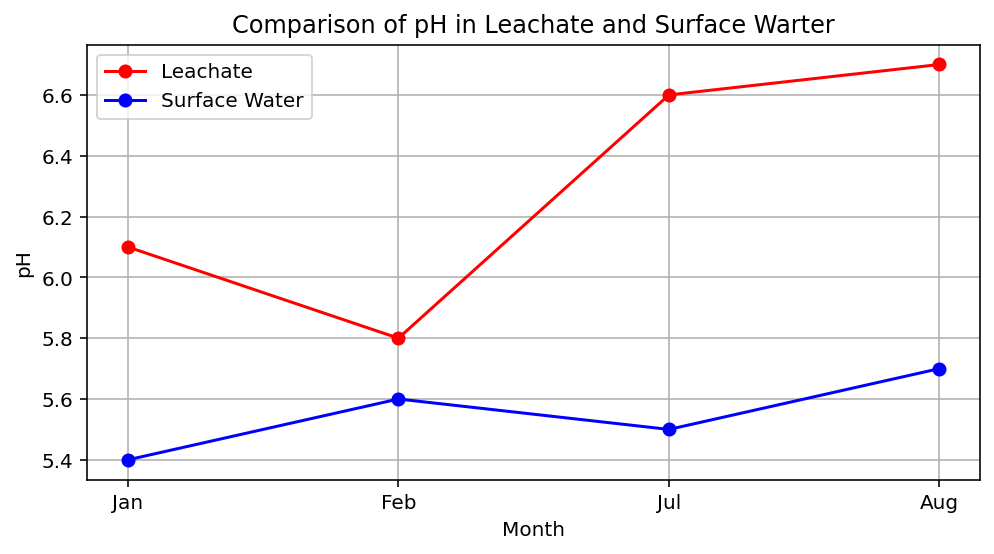

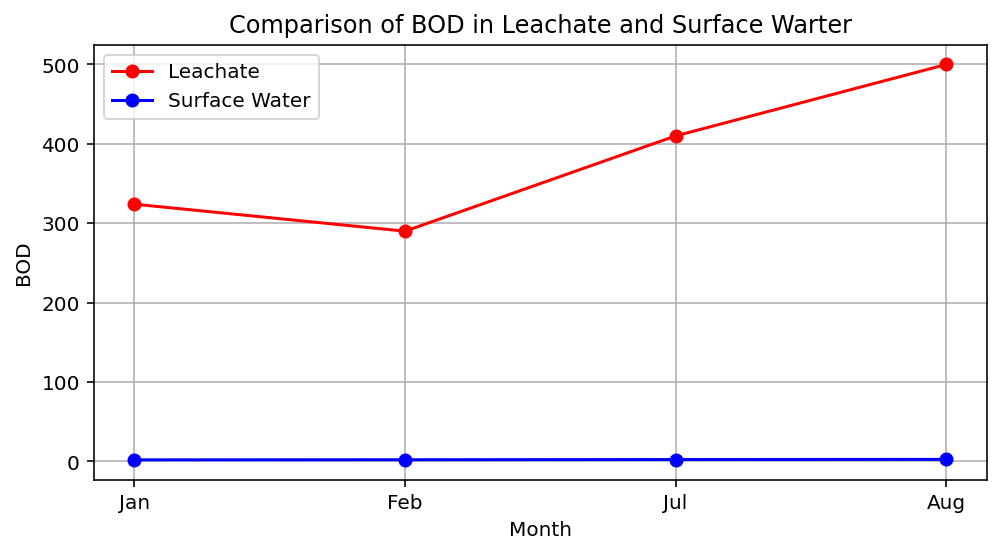

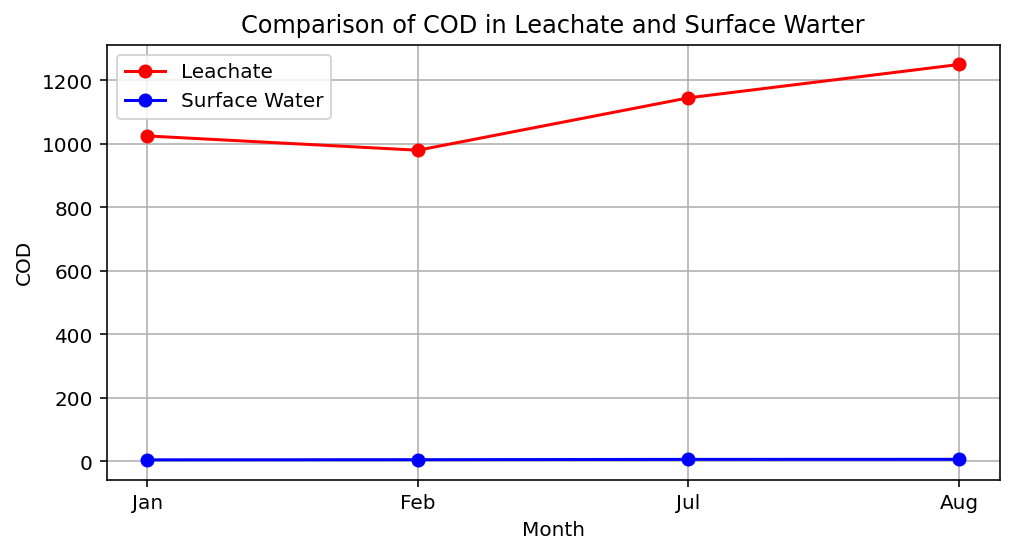

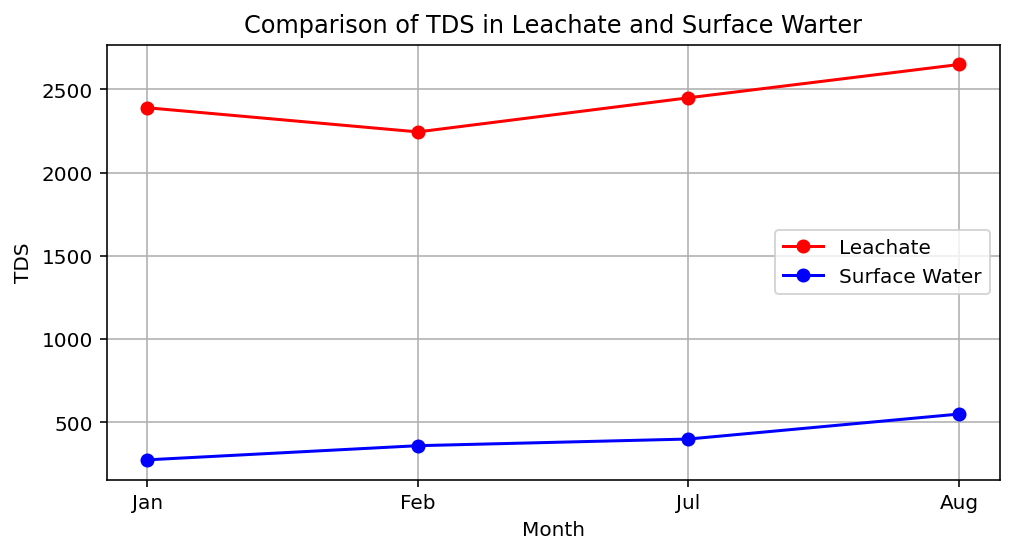

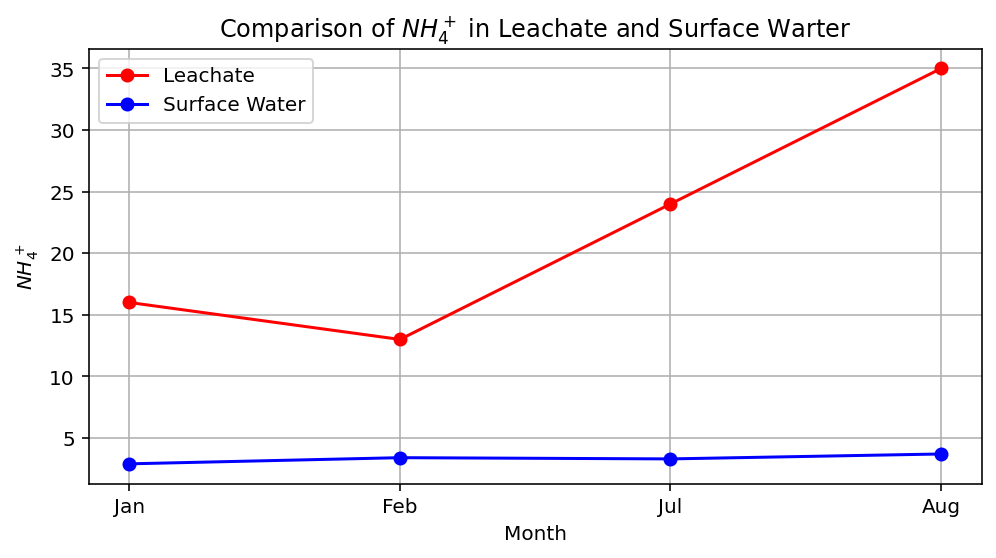

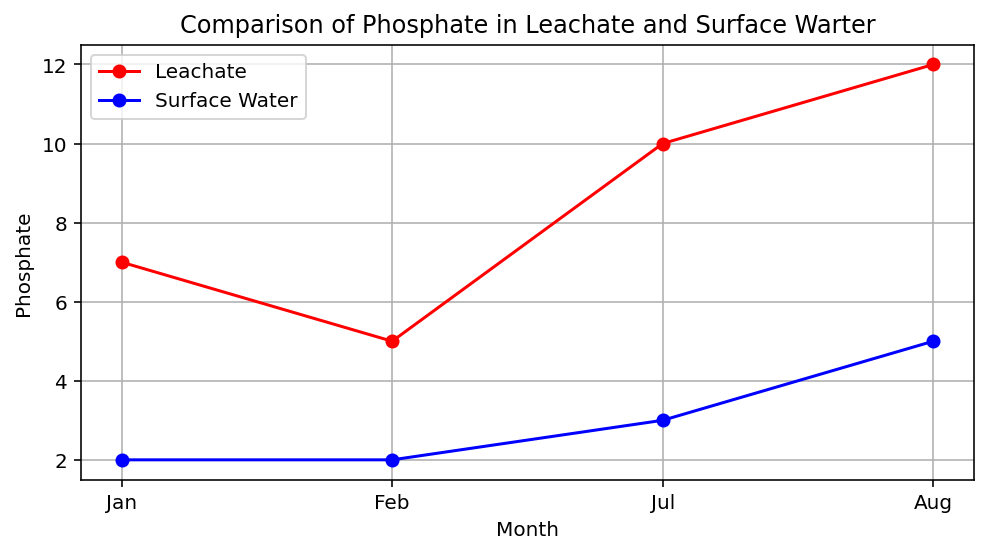

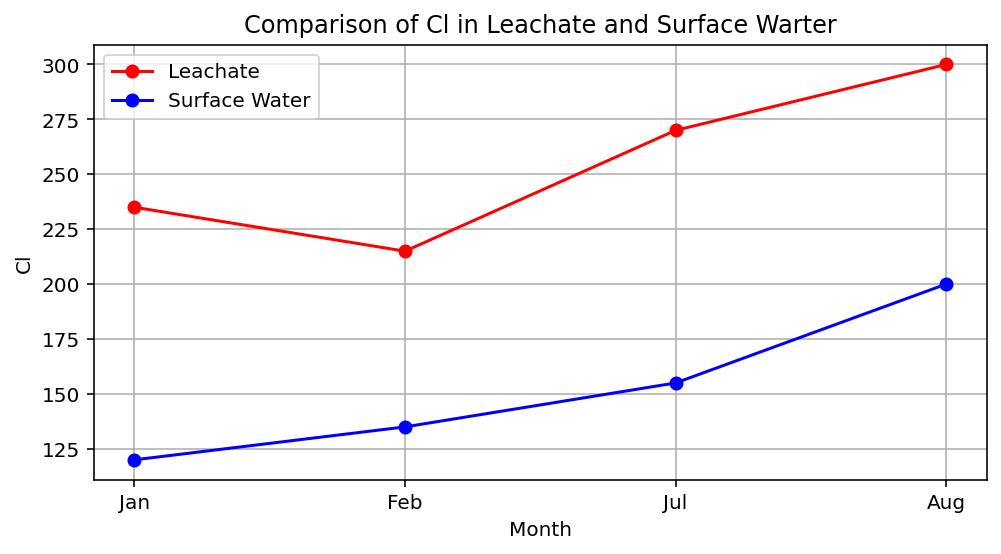

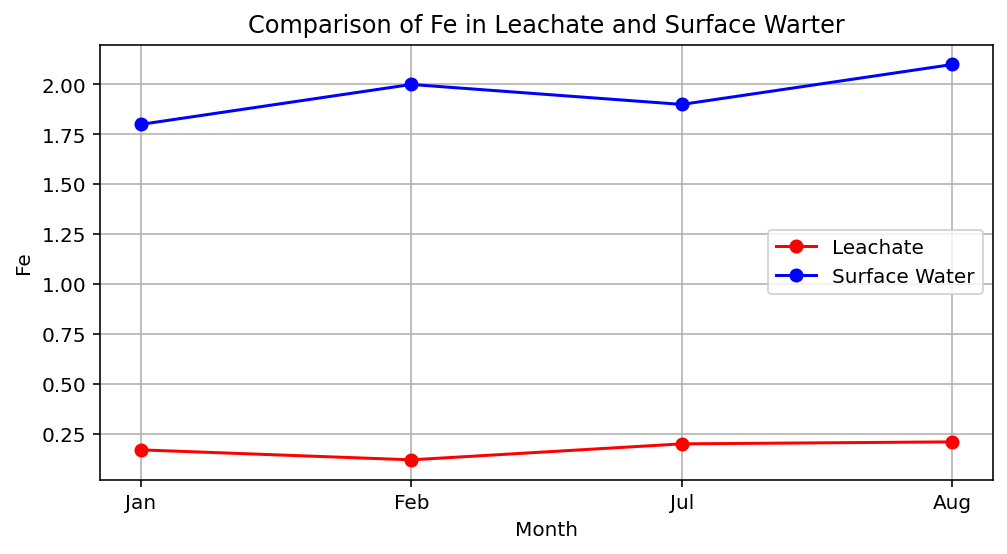

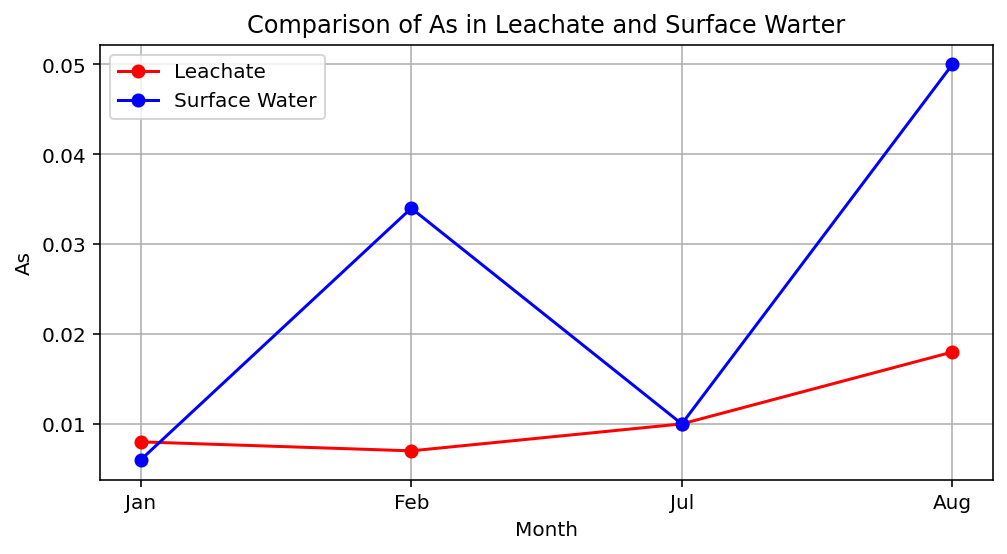

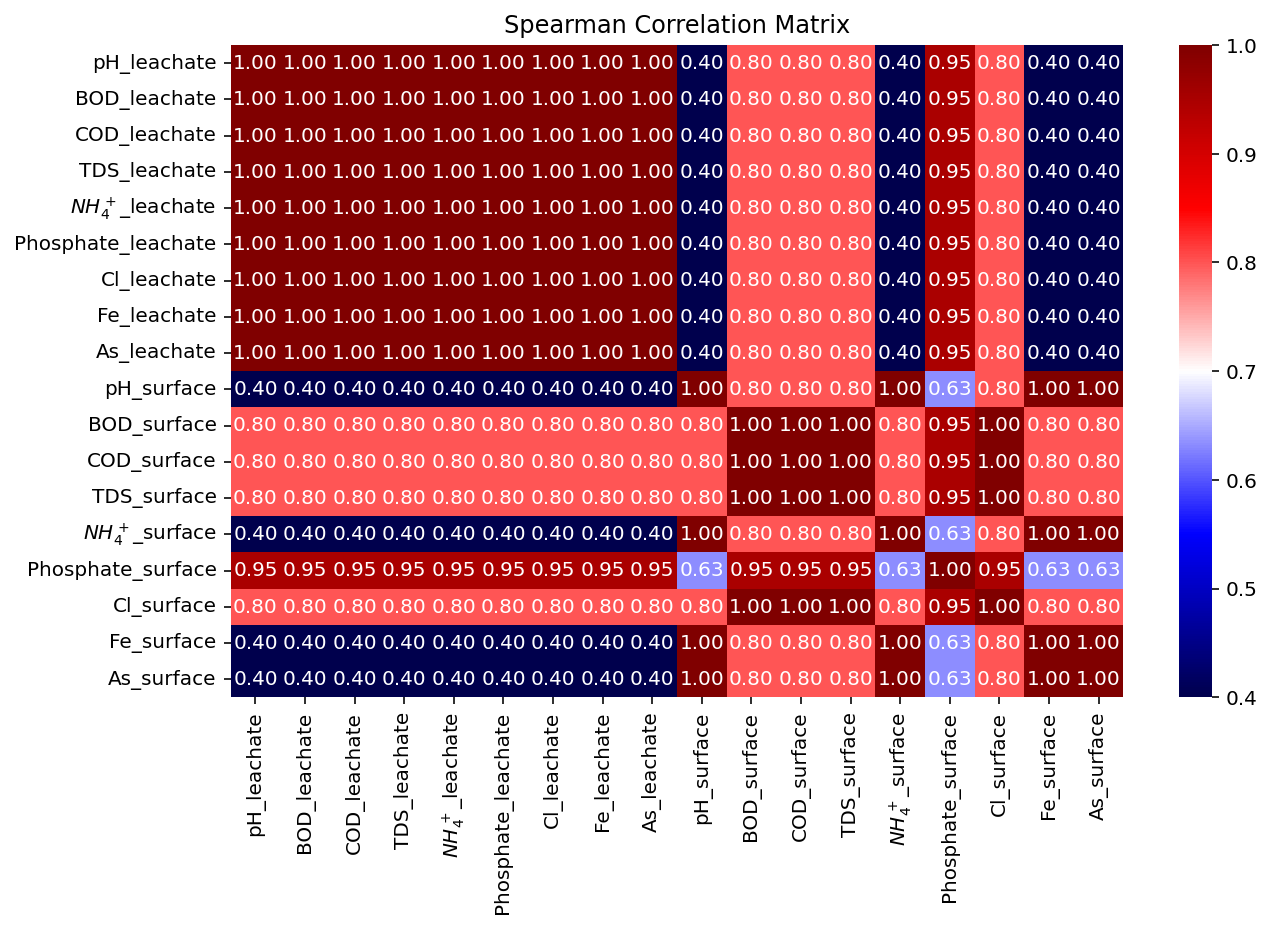

In [11]:
#Comparative Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                        

leachate_data = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Jul', 'Aug'],
    'Season': ['Dry', 'Dry', 'Wet', 'Wet'],
    'pH': [6.1, 5.8, 6.6, 6.7],
    'BOD': [324, 290, 410, 500],
    'COD': [1025, 980, 1145, 1250],
    'TDS': [2390, 2245, 2450, 2650],
    r'$NH_4^+$': [16, 13, 24, 35],                                                                                                    
    'Phosphate': [7, 5, 10, 12],
    'Cl': [235, 215, 270, 300],                 
    'Fe': [0.17, 0.12, 0.2, 0.21],
    'As': [0.008, 0.007, 0.01, 0.018]  
})

surface_water_data = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Jul', 'Aug'],
    'Season': ['Dry', 'Dry', 'Wet', 'Wet'],
    'pH': [5.4, 5.6, 5.5, 5.7],
    'BOD': [1.96, 2.08, 2.34, 2.52],
    'COD': [5.1, 5.6, 6.5, 6.7],
    'TDS': [275, 360, 400, 550],
    r'$NH_4^+$': [2.9, 3.4, 3.3, 3.7],                                        
    'Phosphate': [2, 2, 3, 5],
    'Cl': [120, 135, 155, 200],                                                                                                                                                                                  
    'Fe': [1.8, 2, 1.9, 2.1],
    'As': [0.006, 0.034, 0.01, 0.05]  
})

def plot_comparison(leachate, surface_water, parameter):
    plt.figure(figsize=(8, 4))
    plt.plot(leachate['Month'], leachate[parameter], label = 'Leachate', marker = 'o', linestyle = '-', color = 'r')
    plt.plot(surface_water['Month'], surface_water[parameter], label = 'Surface Water', marker = 'o', linestyle = '-', color = 'b')
    plt.title(f'Comparison of {parameter} in Leachate and Surface Warter')
    plt.xlabel('Month')
    plt.ylabel(parameter)
    plt.legend()
    plt.grid(True)
    plt.show()


for param in ['pH', 'BOD', 'COD', 'TDS',  r'$NH_4^+$', 'Phosphate', 'Cl', 'Fe', 'As']:
    plot_comparison(leachate_data, surface_water_data, param)


#Correlation Analysis                                                                                                                                                                                    
combined_data = pd.merge(leachate_data, surface_water_data, on = 'Month', suffixes = ('_leachate', '_surface'))

# Assuming combined_data contains merged leachate and surface water data
combined_data_numeric = combined_data.select_dtypes(include = ['float64', 'int64'])
correlation_matrix = combined_data_numeric.corr()

# Spearman's correlation matrix                                                            
correlation_matrix_spearman = combined_data_numeric.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='seismic', fmt='.2f')
plt.title("Spearman Correlation Matrix")
plt.savefig("correletion_Spearman.png", dpi=120, orientation='landscape', bbox_inches='tight')  
plt.show()


